In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
modal_properties = []
for i in range(5):
    state_modal_properties = pd.read_csv(f"datasets/state{i}_datasets/state{i}_modal_properties.csv")
    modal_properties.append(state_modal_properties)

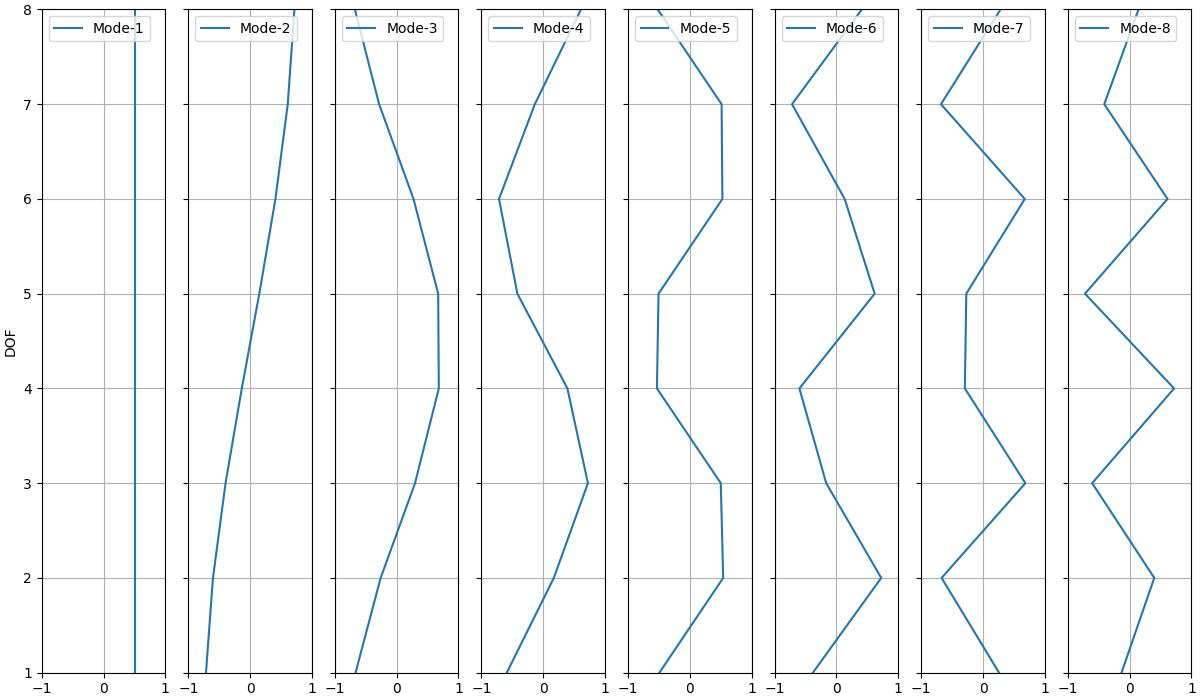

In [14]:
modal_properties[0]
mode_plots = plt.figure(figsize = (12, 7), constrained_layout = True)
mode_axes = mode_plots.subplots(1, 8, sharex = True, sharey = True)
for i in range(8):
    mode_num = [1,2,3,4,5,6,7,8]
    mode_axes[i].plot(modal_properties[0][f"mode {i+1}"], mode_num, label = f"Mode-{i+1}")
    mode_axes[i].grid(True)
    mode_axes[i].set_ylim([1, 8])
    mode_axes[i].set_xlim([-1, 1])
    mode_axes[i].legend(loc = "upper left")
mode_axes[0].set_ylabel("DOF")
plt.savefig("plots/modes.svg")

In [ ]:
# Resonance Frequencies

resonance_plot = plt.figure()
reso_ax = resonance_plot.add_subplot(1,1,1)
for i in range(5):
    state_modal_properties = modal_properties[i]
    modes = [1,2,3,4,5,6,7,8]
    reso_ax.plot(modes, state_modal_properties["Frequencies"], label = f"State #{i}", linewidth = 1, marker = ".")
reso_ax.set_xlabel("Mode Number")
reso_ax.set_ylabel("Frequency (Hz)")
reso_ax.grid(True)
reso_ax.legend(loc = 4)
plt.savefig("freq.svg")

In [ ]:
# Mode Shapes

mode_plots = plt.figure(figsize = (8, 10), constrained_layout = True)
mode_axes = mode_plots.subplots(8, sharex = True, sharey = True)
for i in range(5):
    state_modal_properties = modal_properties[i]
    for j in range(8):
        mode_shape = state_modal_properties[f"mode {j+1}"]
        mode_num = [1,2,3,4,5,6,7,8]
        mode_axes[j].plot(mode_num, mode_shape, label = f"State #{i}", marker = ".", linewidth = 0.8)
        mode_axes[j].grid(True)
        mode_axes[j].set_ylabel(f"Mode #{j+1}")
mode_axes[7].set_xlabel("Degree of Freedom", fontsize = 10)
mode_plots.supxlabel("", fontsize = 10)
mode_plots.supylabel("Mode Amplitude", fontsize = 10)
mode_axes[7].legend(loc='center', bbox_to_anchor=(0.5, -0.7), fancybox=True, shadow=True, ncol=8)
plt.savefig("modeshapes.svg")


In [ ]:
# Modal Assurance Criterian MAC

mac = []
state0_modal_properties = modal_properties[0]
for state in range(5):
    state_modal_properties = modal_properties[state]
    mac_xy = np.zeros((8, 8))
    for i in range(8):
        for j in range(8):
            phi_x = state0_modal_properties[f"mode {i+1}"].values
            phi_y = state_modal_properties[f"mode {j+1}"].values
            mac_xy[i][j] = ((phi_x.dot(phi_y))**2)/((phi_x.dot(phi_x))*(phi_y.dot(phi_y)))
    mac.append(mac_xy)


In [ ]:
i, j = 3, 7
phi_x = (modal_properties[0][f"mode {i+1}"].values)
phi_y = (modal_properties[0][f"mode {j+1}"].values)
xy = ((phi_x.dot(phi_y))**2)/((phi_x.dot(phi_x))*(phi_y.dot(phi_y)))
print("phi_x", phi_x)
print("phi_y", phi_y)
print(xy)

In [ ]:
np.set_printoptions(formatter={"float": "{: 0.4f}".format})
print(mac[4])
dfff = pd.DataFrame(mac[4])
dfff.to_csv("mac.csv")

In [ ]:
modal_properties[0]

In [ ]:
modal_properties[4]

In [ ]:
# Mode Curvature

mode_curvature = []
for state in range(5):
    temp = np.zeros((8, 6))
    state_modal_properties = modal_properties[state]
    mode_curvature_df = pd.DataFrame(temp, columns=[f"ModeCurvature {i}" for i in range(2,8)])
    for i in range(2,8):
        mode_curvature_df[f"ModeCurvature {i}"] = state_modal_properties[f"mode {i-1}"] - 2 * state_modal_properties[f"mode {i}"] + state_modal_properties[f"mode {i+1}"]
        # h = 1m
    mode_curvature.append(mode_curvature_df)

curvature_plots = plt.figure(figsize = (8, 10), constrained_layout = True)
curvature_axes = curvature_plots.subplots(6, sharex = True, sharey = True)
for i in range(5):
    state_mode_curvature = mode_curvature[i]
    for j in range(6):
        mode_curv = state_mode_curvature[f"ModeCurvature {j+2}"]
        dofs = [1,2,3,4,5,6,7,8]
        curvature_axes[j].plot(dofs, mode_curv, label = f"State #{i}", marker = ".", linewidth = 1)
        curvature_axes[j].grid(True)
        curvature_axes[j].set_ylabel(f"Mode #{j+2}")
curvature_axes[5].set_xlabel("Degree of Freedom", fontsize = 10)
curvature_plots.supxlabel("", fontsize = 10)
curvature_plots.supylabel("Curvature", fontsize = 10)
curvature_axes[5].legend(loc='center', bbox_to_anchor=(0.5, -0.5), fancybox=True, shadow=True, ncol=8)

plt.savefig("modecurvature.svg")

In [ ]:
mode_curvature[1]

In [ ]:
# Modal Strain Energy

modal_strain_energy = []
for state in range(5):
    temp = np.zeros((7, 8))
    modal_se_df = pd.DataFrame(temp, columns=[f"Mode {i}" for i in range(1,9)])
    state_modal_properties = modal_properties[state]
    for i in range(1, 9):
        for spring_num in range(7):
            modal_se_df[f"Mode {i}"][spring_num] = (state_modal_properties[f"mode {i}"][spring_num + 1] - state_modal_properties[f"mode {i}"][spring_num ])**2
    modal_strain_energy.append(modal_se_df)

se_plots = plt.figure(figsize = (8, 10), constrained_layout = True)
se_axes = se_plots.subplots(8, sharex = True, sharey = True)
for i in range(5):
    state_modal_se = modal_strain_energy[i]
    for j in range(8):
        mode_se = state_modal_se[f"Mode {j+1}"].values
        springs = [1,2,3,4,5,6,7]
        se_axes[j].plot(springs, mode_se, label = f"State #{i}", linewidth = 1)
        se_axes[j].grid(True)
        se_axes[j].set_ylabel(f"Mode #{j+1}")
se_axes[7].set_xlabel("Spring", fontsize = 10)
se_plots.supxlabel("", fontsize = 10)
se_plots.supylabel("Strain Energy", fontsize = 10)
se_axes[7].legend(loc='center', bbox_to_anchor=(0.5, -0.7), fancybox=True, shadow=True, ncol=8)

plt.savefig("modalstrainenergy.svg")

In [ ]:
# Modal Flexibility
modal_flexibility = []
for state in range(5):
    G = np.zeros((8,8))
    state_modal_properties = modal_properties[state]
    for i in range(8):
        phi_i = np.array([(state_modal_properties[f"mode {i+1}"].values)])
        w_i = state_modal_properties["Frequencies"][i] * (2 * np.pi)
        temp = (phi_i.T @ phi_i)/(w_i**2)
        G = G + temp
    modal_flexibility.append(G)

modal_flexibility[0]


In [ ]:
k_1 = k_2 = k_3 = k_4 = k_5 = k_6 = k_7 = 5500.0

K0 = np.array(
    [
        [k_1, -k_1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
        [-k_1, k_1 + k_2, -k_2, 0.0, 0.0, 0.0, 0.0, 0.0],
        [0.0, -k_2, k_2 + k_3, -k_3, 0.0, 0.0, 0.0, 0.0],
        [0.0, 0.0, -k_3, k_3 + k_4, -k_4, 0.0, 0.0, 0.0],
        [0.0, 0.0, 0.0, -k_4, k_4 + k_5, -k_5, 0.0, 0.0],
        [0.0, 0.0, 0.0, 0.0, -k_5, k_5 + k_6, -k_6, 0.0],
        [0.0, 0.0, 0.0, 0.0, 0.0, -k_6, k_6 + k_7, -k_7],
        [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -k_7, k_7],
    ]
)
inv = np.linalg.inv(K0)
inv